In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-million-song-dataset/spotify_millsongdata.csv


In [33]:
df = pd.read_csv('/kaggle/input/spotify-million-song-dataset/spotify_millsongdata.csv')

In [34]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [35]:
df.tail(5)

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [36]:
df.shape

(57650, 4)

In [37]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [38]:
df =df.sample(15000).drop('link', axis=1).reset_index(drop=True)

In [39]:
df.head(10)

,artist,song,text
0,Tina Turner,In Your Wildest Dreams,The sun goes down \r\nAnd the moon comes up ...
1,"Harry Connick, Jr.",I'm Walkin',"I'm walkin', yes indeed and I'm talkin' \r\nA..."
2,Billie Holiday,He's Funny That Way,Never had nothing \r\nNo one to care \r\nTha...
3,Demi Lovato,Quiet,I hear what you're not saying \r\nIt's drivin...
4,Modern Talking,Locomotion Tango,Love is a lie and \r\nLove is a mess \r\nTel...
5,Nazareth,Just To Get Into It,I know that she don't like me \r\nShe knows t...
6,Nickelback,Holding On To Heaven,And if forever never comes tonight \r\nAnd if...
7,Cheap Trick,Won't Take No For An Answer,Hey wait a minute \r\nYou're a little lost \...
8,Bruce Springsteen,Bishop Danced,Bishop danced with a thumbscrew woman \r\nDid...
9,Carol Banawa,I Believe,"I see from look in your eyes, there's \r\nSom..."


In [40]:
df['text'][0]


"The sun goes down  \r\nAnd the moon comes up  \r\nMy heart is pumping for you  \r\nAnd a mad thing starts  \r\nOoooohhh-oooooohhh  \r\n  \r\nNever in you wildest dreams  \r\nDid you ever get this feeling  \r\nNever in your wildest dreams  \r\nNever in your wildest dreams  \r\nCould it ever be this easy  \r\nNever in your wildest dreams  \r\n  \r\nThe night is hot outside your window  \r\nI hear people walking people talking  \r\nI smell your skin I feel you breathing  \r\nDon't let me go not yet, not yet, not yet, not yet  \r\n  \r\nNever in your wildest dreams  \r\nCould you ever get this easy  \r\nNever in your wildest dreams  \r\nNever in your wildest dreams  \r\nDid it ever get this easy  \r\nNever in your wildest dreams  \r\n  \r\nAnd the world is slowly turning  \r\nAs it turns I see your face  \r\nTouch your eyes, your lips. . .space  \r\n  \r\nWe've arrived at the place  \r\nWhere they open hearts  \r\nAnd fill them up with love  \r\nFilled with love filled with love  \r\nThis

In [41]:
df.shape

(15000, 3)

# Data Visualization

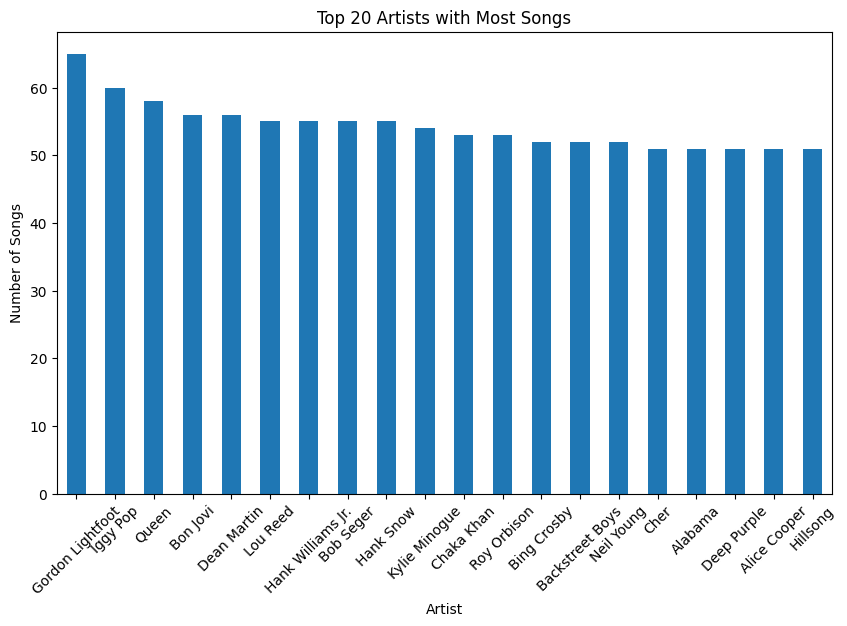

In [42]:
import matplotlib.pyplot as plt

# Distribution of songs by artists
plt.figure(figsize=(10, 6))
df['artist'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Artists with Most Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

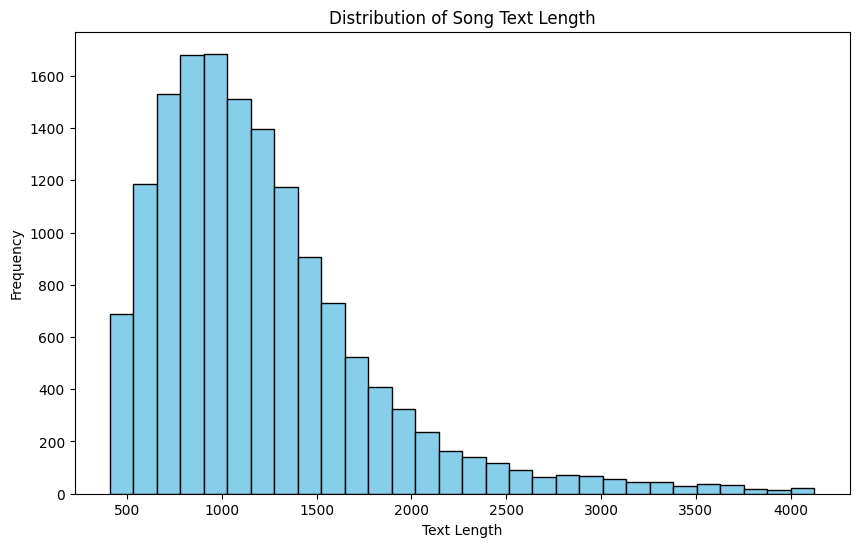

In [43]:
# Distribution of song lengths
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# It helps in understanding the typical length or range of song lyrics in the dataset.

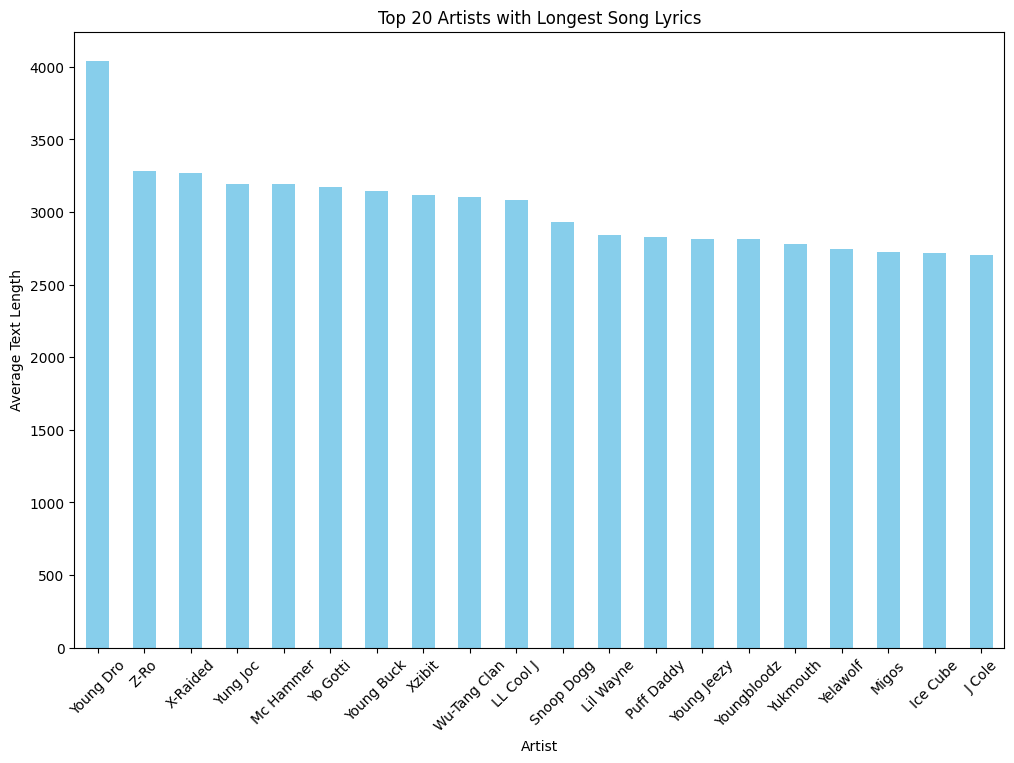

In [44]:
df['text_length'] = df['text'].apply(len)

# Average song length by artist
artist_avg_length = df.groupby('artist')['text_length'].mean().sort_values(ascending=False)[:20]

# Plotting the average song length by artist
plt.figure(figsize=(12, 8))
artist_avg_length.plot(kind='bar', color='skyblue')
plt.title('Top 20 Artists with Longest Song Lyrics')
plt.xlabel('Artist')
plt.ylabel('Average Text Length')
plt.xticks(rotation=45)
plt.show()

# This plot helps identify the artists whose songs, on average, have the longest lyrics in the dataset.

# Text Cleaning and Text Preprocessing

In [45]:
df['text'][0]

"The sun goes down  \r\nAnd the moon comes up  \r\nMy heart is pumping for you  \r\nAnd a mad thing starts  \r\nOoooohhh-oooooohhh  \r\n  \r\nNever in you wildest dreams  \r\nDid you ever get this feeling  \r\nNever in your wildest dreams  \r\nNever in your wildest dreams  \r\nCould it ever be this easy  \r\nNever in your wildest dreams  \r\n  \r\nThe night is hot outside your window  \r\nI hear people walking people talking  \r\nI smell your skin I feel you breathing  \r\nDon't let me go not yet, not yet, not yet, not yet  \r\n  \r\nNever in your wildest dreams  \r\nCould you ever get this easy  \r\nNever in your wildest dreams  \r\nNever in your wildest dreams  \r\nDid it ever get this easy  \r\nNever in your wildest dreams  \r\n  \r\nAnd the world is slowly turning  \r\nAs it turns I see your face  \r\nTouch your eyes, your lips. . .space  \r\n  \r\nWe've arrived at the place  \r\nWhere they open hearts  \r\nAnd fill them up with love  \r\nFilled with love filled with love  \r\nThis

In [46]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [47]:
df['text'][0]

"the sun goes down  \r and the moon comes up  \r my heart is pumping for you  \r and a mad thing starts  \r ooooohhh-oooooohhh  \r   \r never in you wildest dreams  \r did you ever get this feeling  \r never in your wildest dreams  \r never in your wildest dreams  \r could it ever be this easy  \r never in your wildest dreams  \r   \r the night is hot outside your window  \r i hear people walking people talking  \r i smell your skin i feel you breathing  \r don't let me go not yet, not yet, not yet, not yet  \r   \r never in your wildest dreams  \r could you ever get this easy  \r never in your wildest dreams  \r never in your wildest dreams  \r did it ever get this easy  \r never in your wildest dreams  \r   \r and the world is slowly turning  \r as it turns i see your face  \r touch your eyes, your lips. . .space  \r   \r we've arrived at the place  \r where they open hearts  \r and fill them up with love  \r filled with love filled with love  \r this on is pumping for you  \r as a m

In [48]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)


# example of stemming:  programming,programmer and programs ===> program  
# Original text: running runs ran
# Stemmed text: run run ran

In [49]:
df['text'] = df['text'].apply(lambda x: tokenization(x))

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['text'])
similarity = cosine_similarity(matrix)

In [52]:
similarity[0]

array([1.        , 0.00409107, 0.01188227, ..., 0.00461427, 0.00344366,
       0.02546528])

In [59]:
df[df['song'] == 'In Your Wildest Dreams']

,artist,song,text,text_length
0,Tina Turner,In Your Wildest Dreams,the sun goe down and the moon come up my heart...,1181


In [54]:
def recommendation(song_df):
    if song_df not in df['song'].values:
        return "Song not found"
    
    idx = df[df['song'] == song_df].index[0]
    distances = sorted(list(enumerate(similarity[idx])),reverse=True,key=lambda x:x[1])
    
    songs = []
    for m_id in distances[1:21]:
        songs.append(df.iloc[m_id[0]].song)
        
    return songs


In [60]:
recommendation('In Your Wildest Dreams')

['I Had A Dream',
 'Nearness Of You, The',
 'Borderline',
 'Dream Operator',
 'Dream On',
 "Isn't It Nice",
 'All I Have To Do Is Dream',
 'Dream Baby Dream',
 'Dreams To Dream',
 'Dream Of Me',
 "Dreamin'",
 'Bobby Jean',
 'Dream A Little Dream',
 'Dream',
 'See You In Your Dreams',
 'Dream Sweet Dreams About Me',
 "Don't Hold Back",
 'I Keep Dreaming Of You All The Time',
 'Dream Dancing',
 'Beautiful Dream']

In [61]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

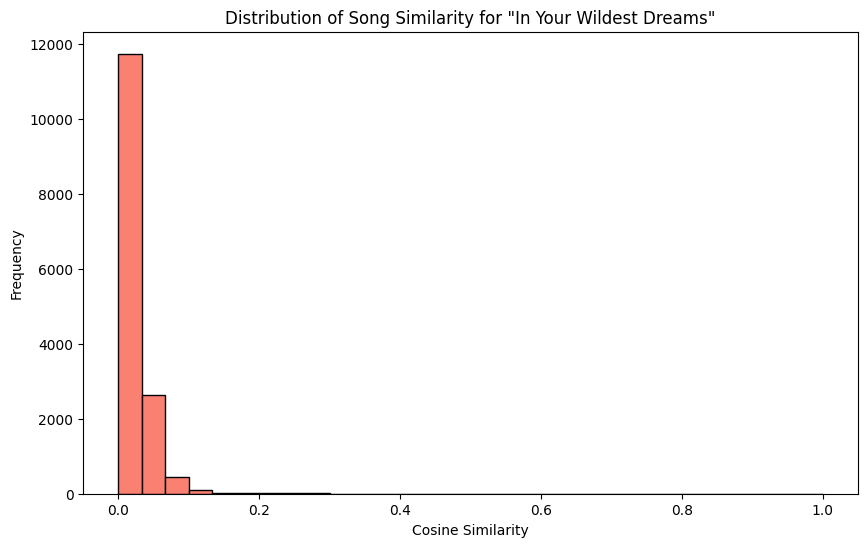

In [62]:

# Distribution of song similarity for a specific song
def plot_song_similarity(song_name):
    idx = df[df['song'] == song_name].index[0]
    song_similarities = similarity[idx]
    
    plt.figure(figsize=(10, 6))
    plt.hist(song_similarities, bins=30, color='salmon', edgecolor='black')
    plt.title(f'Distribution of Song Similarity for "{song_name}"')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.show()

# Let's visualize the similarity distribution for a specific song, say "Crying Over You"
plot_song_similarity('In Your Wildest Dreams')
